In [1]:
import pandas as pd
import numpy as np
### Load Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Load Text Cleaning packages
import neattext.functions as nfx

In [2]:
#Load our dataset
df = pd.read_csv('emotion_dataset_raw.csv')

In [3]:
#preview
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df.shape

(34792, 2)

In [5]:
#datatypes
df.dtypes

Emotion    object
Text       object
dtype: object

In [6]:
#check for missing values
df.isnull().any()

Emotion    False
Text       False
dtype: bool

In [7]:
#get the value counts of the emotions
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

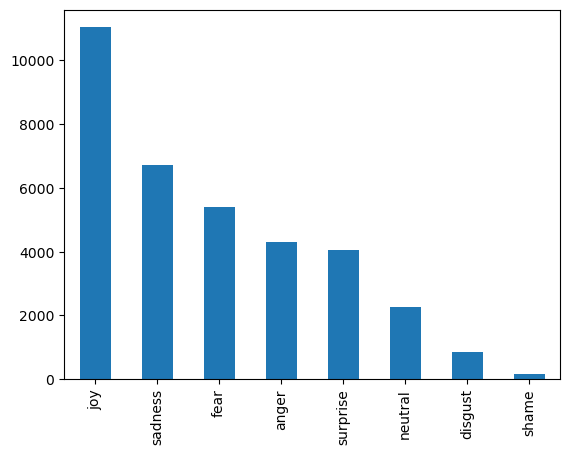

In [8]:
df['Emotion'].value_counts().plot(kind='bar')

C:\ProgramData\Anaconda3\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

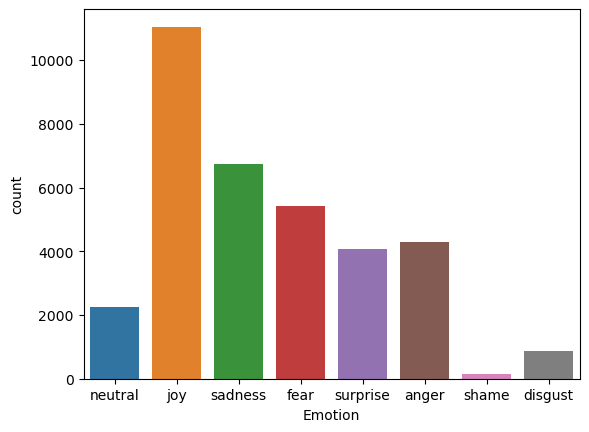

In [9]:
# Using Seaborn to plot
sns.countplot(df['Emotion']) #Old method

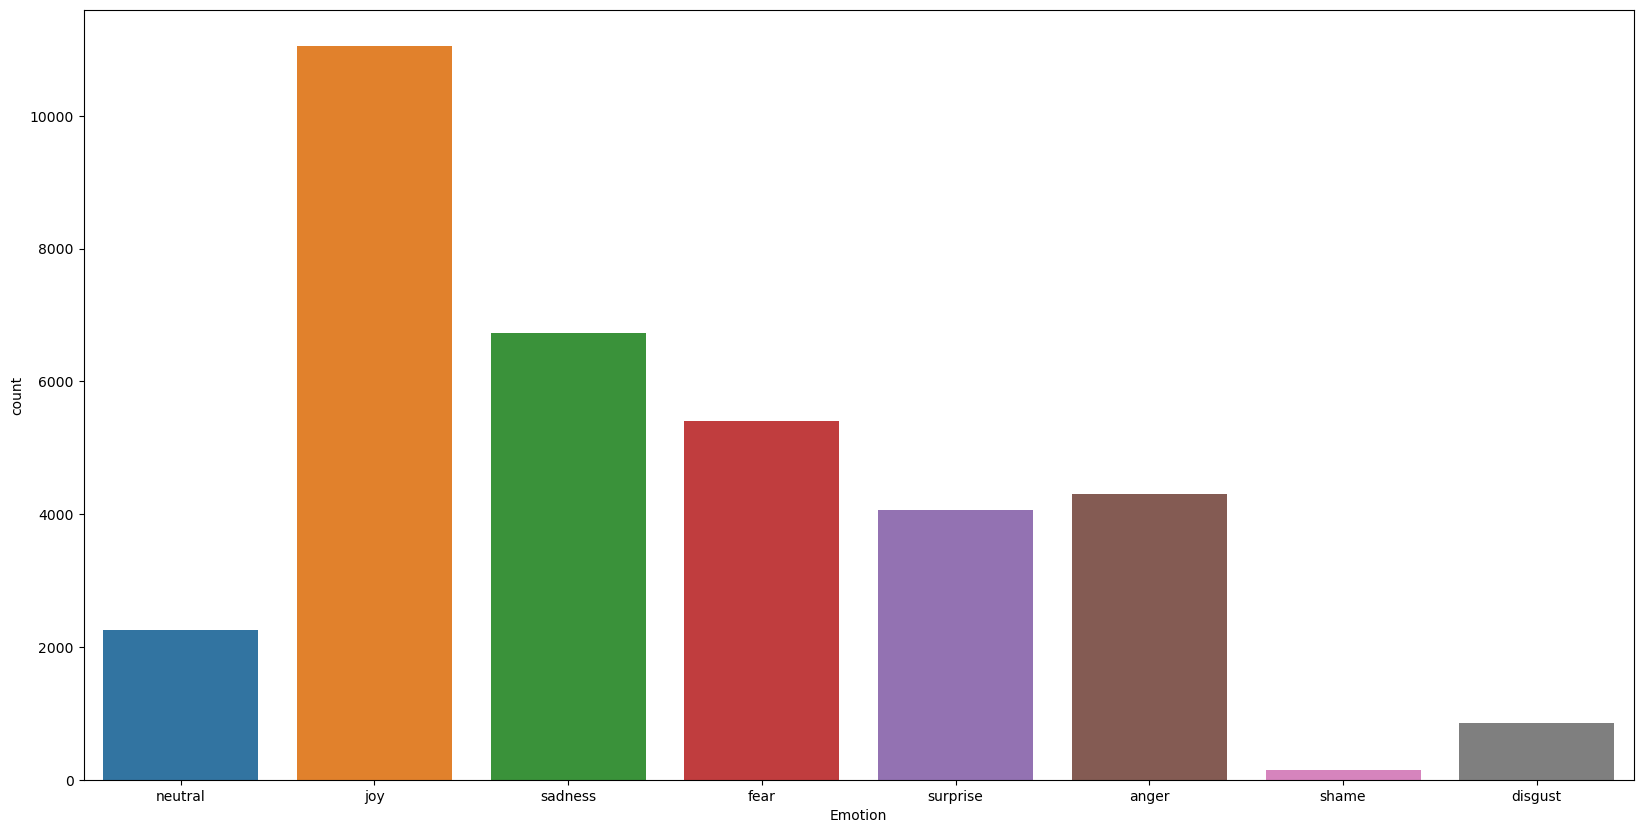

In [11]:
# Advanced method
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion', data = df)
plt.show()

### Exploration (EDA)

+ Sentiment Analysis
+ Keyword Extraction
    + Keywords for each emotion 
    + WordCloud

In [12]:
#Sentiment Analysis
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = 'Neutral'
    return result

In [14]:
# Test Funtion
get_sentiment("I hate coding")

'Negative'

In [15]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [16]:
df.head(30)

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral
5,fear,I'm expecting an extremely important phonecall...,Positive
6,sadness,.Couldnt wait to see them live. If missing th...,Negative
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,Neutral
8,surprise,En dan krijg je ff een cadeautje van een tweep...,Neutral
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Neutral


In [17]:
# Compare our emotions and Sentiment
df.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

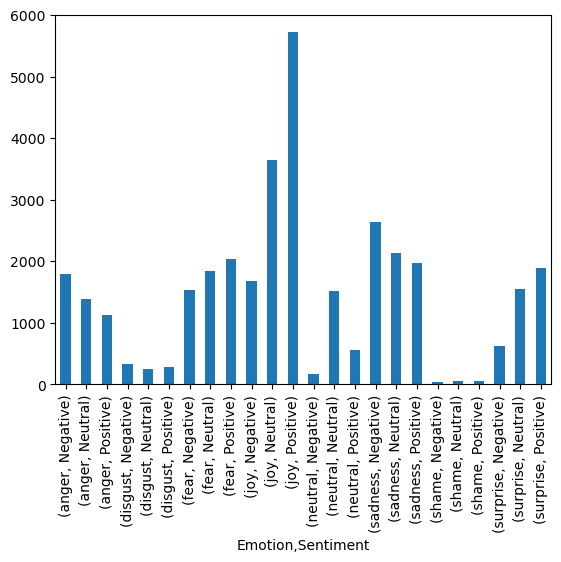

In [18]:
# First ploting methon: using Matplotlib
# comapre our Emotion vs Sentiment
df.groupby(['Emotion', 'Sentiment']).size().plot(kind='bar')

C:\ProgramData\Anaconda3\ana\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\ana\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


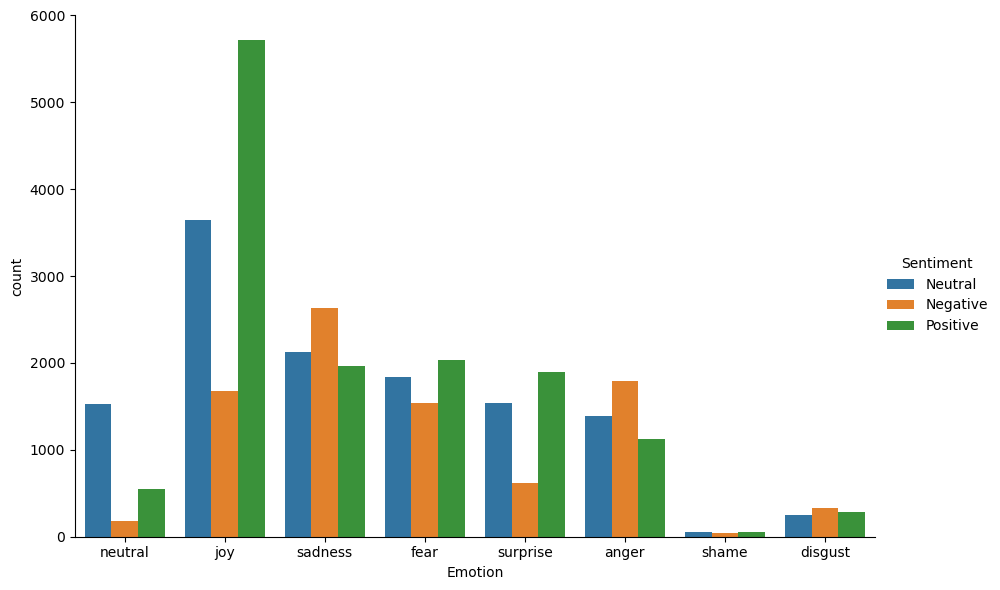

In [19]:
# Using Seaborn
# Sns.factorplot or
# sns.catplot

sns.factorplot(x='Emotion', hue='Sentiment',data=df, kind='count', size=6, aspect=1.5)

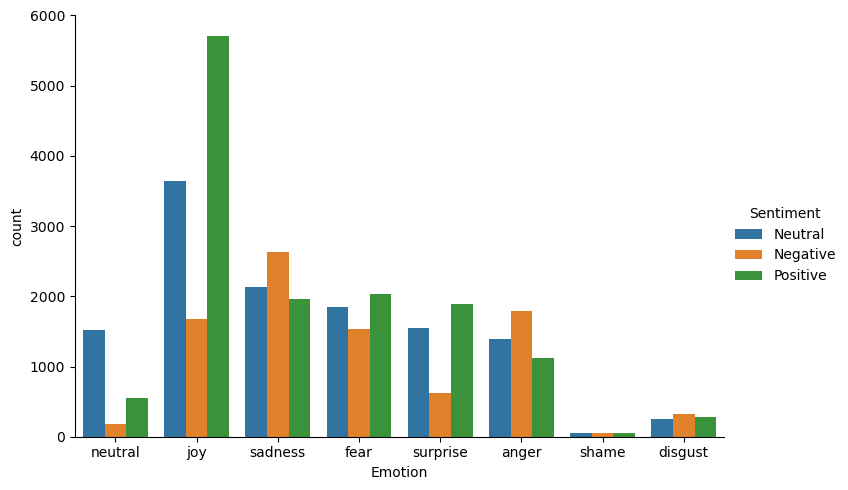

In [20]:
sns.catplot(x='Emotion', data=df, hue='Sentiment', kind='count',aspect=1.5)

### Text Cleaning
+ Remove noise
    - Stopwords
    - Special Characters
    - Punctuations
    - Emojis

In [21]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### Keyword Extraction
+ Extract the most commonest words per class of emotion  

In [24]:
from collections import Counter

In [25]:
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [26]:
#List of emotions

emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [27]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [28]:
#Joy Document
joy_docx = ' '.join(joy_list) #why am I doing this? Just to create a document of the whole 'joy' so as to get the keyword
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [29]:
#Extract the keywords
keywords_joy = extract_keywords(joy_docx)
keywords_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [30]:
# Plot
def plot_most_common_words(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token', 'count'])
    plt.figure(figsize=(20,10))
    plt.title('Plot of {} Most Common Keywords'.format(emotion_name))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

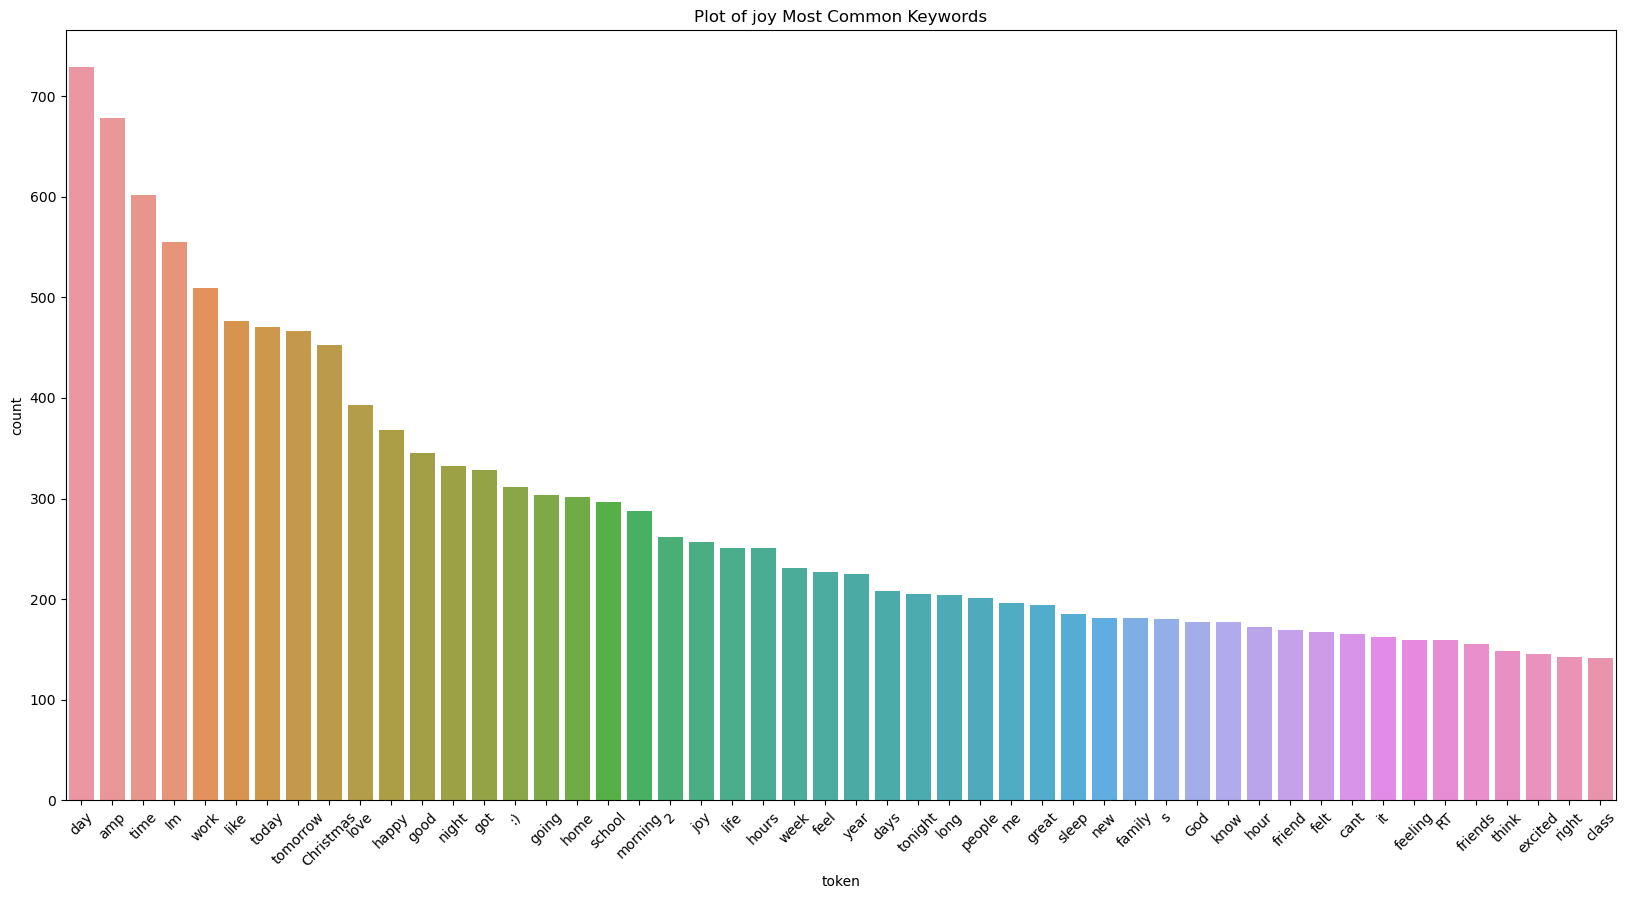

In [31]:
plot_most_common_words(keywords_joy, 'joy')

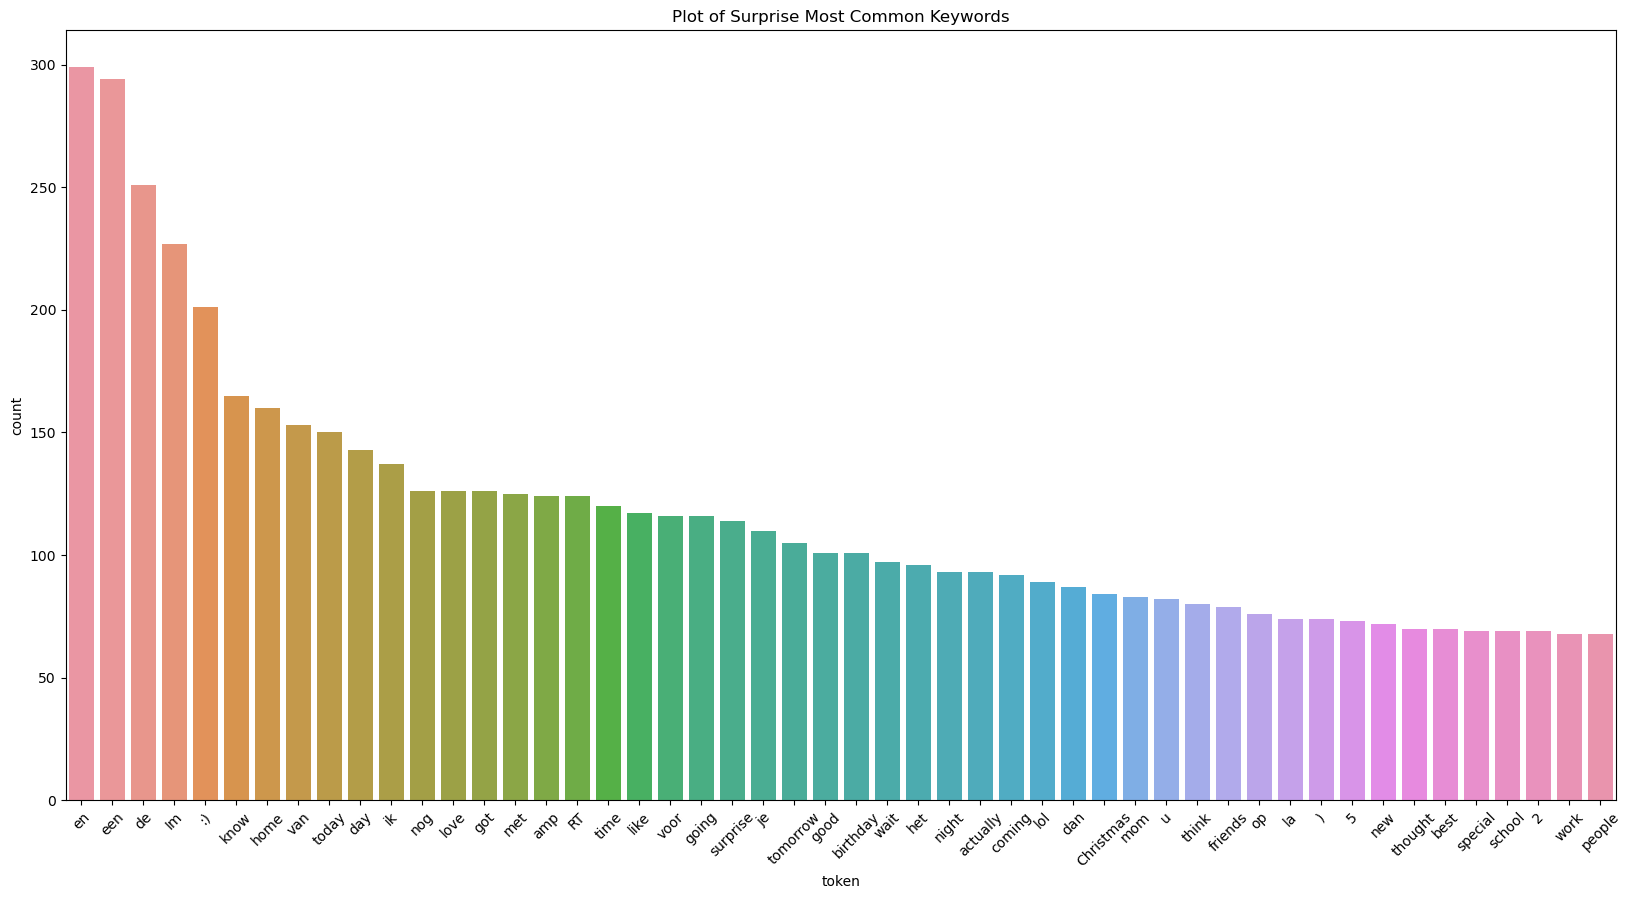

In [32]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()

# Let's create a document
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)
plot_most_common_words(keyword_surprise, 'Surprise')

In [33]:
## Word Cloud

from wordcloud import WordCloud

In [34]:
def plot_word_cloud(docx):
    word_cloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show

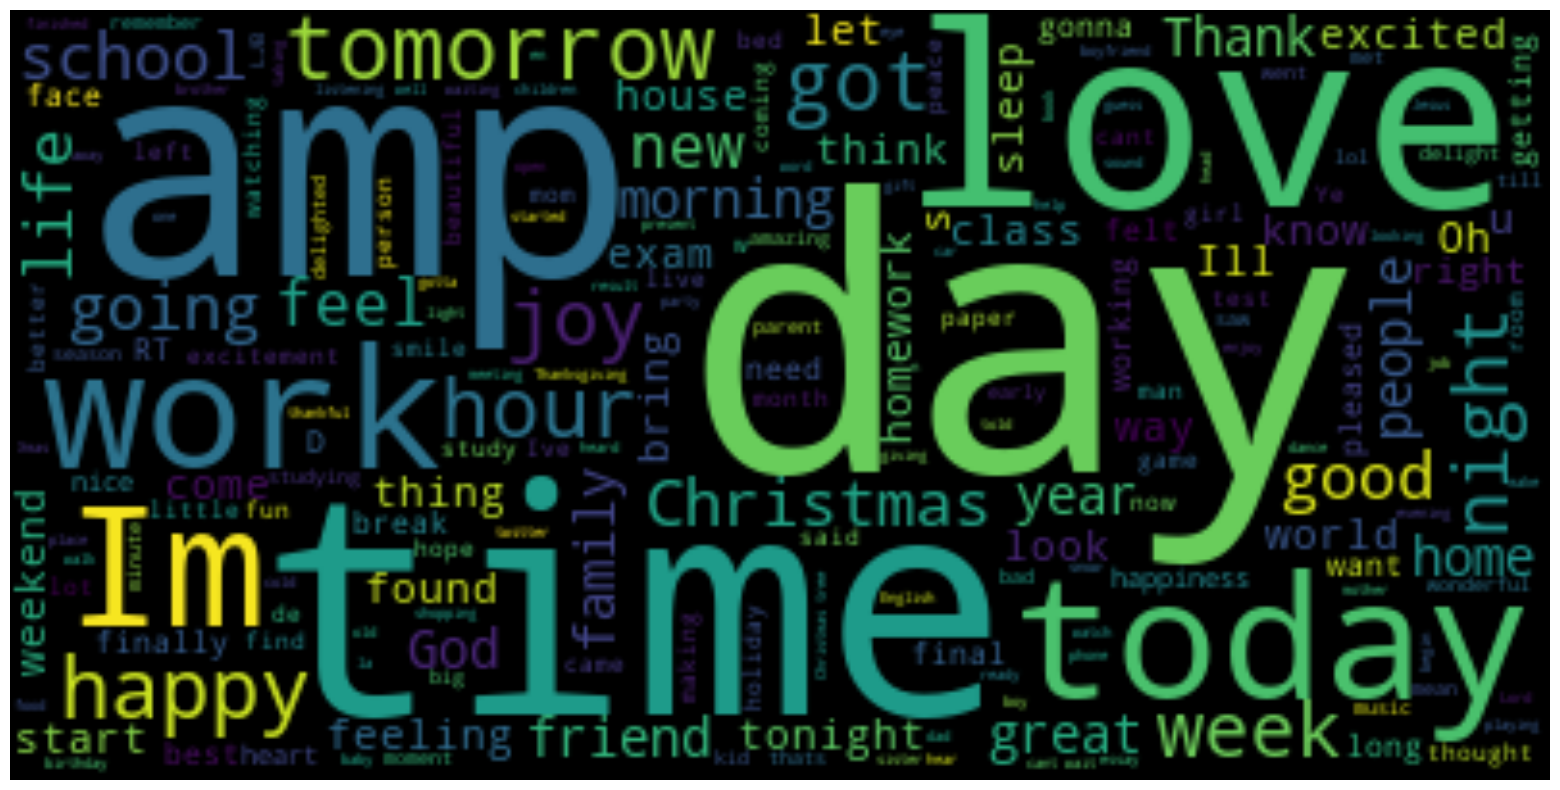

In [35]:
plot_word_cloud(joy_docx)

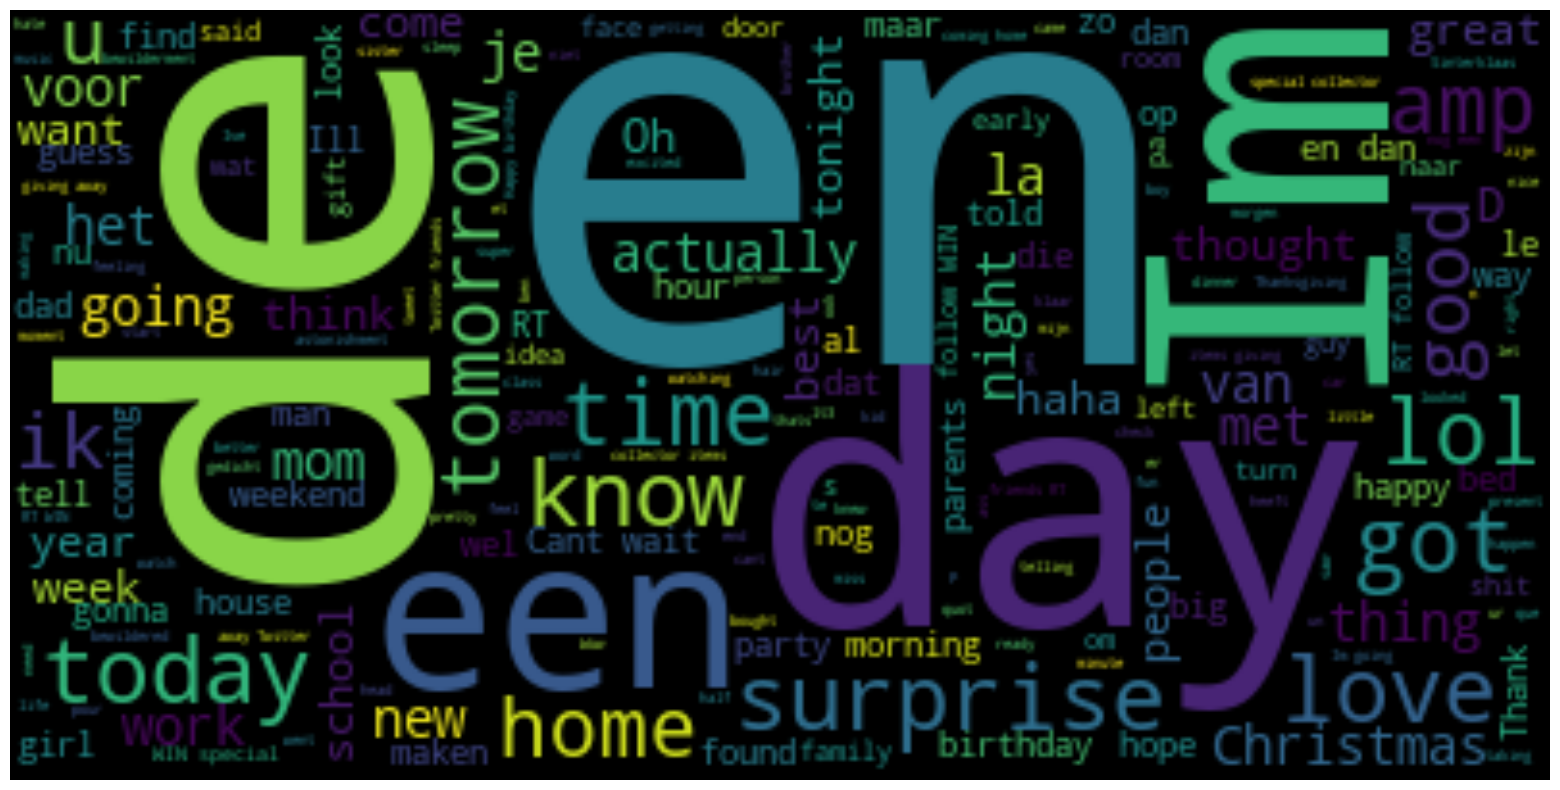

In [36]:
plot_word_cloud(surprise_docx)

### Machine Learning
+ Naive Bayes
+ LogisticsRegression
+ KNN
+ DecisionTree

In [37]:
# Load ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# as you might have already knonw most ML models doesnt understand text they do understand numbers, we have to vectorizer (We need to convert the text in to numbers)

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
# Split Our Dataset
# we can use sklearn to split or pandandas but let's use sklern 

from sklearn.model_selection import train_test_split

### Build Features From Our Text


In [39]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [40]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [41]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [42]:
# Get  Features By Name 
cv.get_feature_names()

C:\ProgramData\Anaconda3\ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [43]:
# To Dense Array (NUMPY)
X.toarray() ##it's a memory error. my system do not have the capacity to run this line of code :) 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
# Split Dataset
X_train, X_test, y_train ,y_test = train_test_split(X, ylabels,test_size=0.3,random_state=42)

#### Build Our Model

In [45]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [46]:
# Check for Accuracy
# this is method 1
nv_model.score(X_test,y_test)

0.5642843456600881

In [47]:
# Predictions
y_nv_pred = nv_model.predict(X_test)
y_nv_pred

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make A Single  Prediction
+ Vectorized our Text
+ Applied our model

In [48]:
sample_text = ['I love coding so much']
vect = cv.transform(sample_text).toarray()

In [49]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [50]:
#Check for the Prediction Probability(Percentage)Confidence Score. Just saying why do we have 'joy', 'anger' and 'fear'
nv_model.predict_proba(vect) # the result is complicated right? Let's make it more understandable

array([[7.71887420e-03, 4.32378488e-04, 6.13255211e-02, 6.78601776e-01,
        1.91245761e-04, 2.40467259e-01, 1.63388024e-06, 1.12613108e-02]])

In [51]:
# Get all the class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [52]:
np.max(nv_model.predict_proba(vect)) # it's 67% certain that it's 'joy'

0.6786017763391645

In [53]:
# Lets' create a function for better understanding 
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_prob = model.predict_proba(myvect)
    pred_perc = dict(zip(model.classes_,pred_prob[0]))
    print('Prediction:{}, Prediction Score: {}'.format(prediction[0:3],np.max(pred_prob *100)))
    return pred_perc

In [54]:
predict_emotion(sample_text,nv_model)

Prediction:['joy'], Prediction Score: 67.86017763391645


{'anger': 0.007718874198816172,
 'disgust': 0.0004323784877583124,
 'fear': 0.06132552108584217,
 'joy': 0.6786017763391645,
 'neutral': 0.00019124576121008267,
 'sadness': 0.24046725945228875,
 'shame': 1.6338802443624819e-06,
 'surprise': 0.011261310794677947}

In [55]:
predict_emotion(['another ending? i almost pooped my pants'],nv_model)

Prediction:['surprise'], Prediction Score: 58.8320256027545


{'anger': 0.052785197521778966,
 'disgust': 0.018984261306963707,
 'fear': 0.015300190041001875,
 'joy': 0.18915073249745112,
 'neutral': 0.01050353352280391,
 'sadness': 0.12380936149447166,
 'shame': 0.0011464675879833844,
 'surprise': 0.588320256027545}

In [56]:
predict_emotion(['WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS'],nv_model)

Prediction:['sadness'], Prediction Score: 94.31042540328521


{'anger': 0.024978173490141597,
 'disgust': 0.00029204294577029016,
 'fear': 0.008966851943474997,
 'joy': 0.02188859404235753,
 'neutral': 2.833535695182039e-06,
 'sadness': 0.943104254032852,
 'shame': 8.888457680057649e-08,
 'surprise': 0.0007671611251321409}

### Model Evaluation

In [57]:
# Classification
print(classification_report(y_test,y_nv_pred))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [58]:
# Confusion 
confusion_matrix(y_test, y_nv_pred)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

C:\ProgramData\Anaconda3\ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


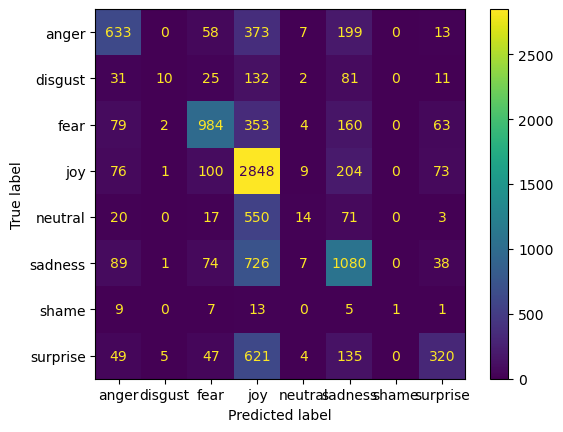

In [59]:
# Plot Confusion Matrix
plot_confusion_matrix(nv_model, X_test,y_test)

### Save Model

In [60]:
import joblib

In [61]:
model_file = open('emotion_classifier_nv_model_jan_2023.pkl', 'wb')
joblib.dump(nv_model,model_file)
model_file.close()

### Model Interpretation 
+ Eli5
+ Line
+ Shap

In [62]:
# LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


C:\ProgramData\Anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
# Acccuracy
lr_model.score(X_test,y_test)

0.622341444721211

In [64]:
# Single Prediction 
predict_emotion(sample_text,lr_model)

Prediction:['joy'], Prediction Score: 69.06398977983913


{'anger': 0.024532614876446302,
 'disgust': 0.012388764730214398,
 'fear': 0.04928851819104597,
 'joy': 0.6906398977983913,
 'neutral': 0.02000472143867769,
 'sadness': 0.15878333477204362,
 'shame': 0.0008613484100937428,
 'surprise': 0.043500799783086984}

In [65]:
# Interpret Model
import eli5 #ELI5 is a Python package which helpsto debug machine learning classifiers and explain their predictions.

In [66]:
# Show the Weight for Each Class/Label
eli5.show_weights(lr_model, top=20)

In [67]:
class_names =ylabels.unique().tolist()

In [68]:
feature_names = cv.get_feature_names_out()

In [69]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)